# UAV Detection and Tracking

Multi-Object Tracking (MOT) is a core visual ability that humans poses to perform kinetic tasks and coordinate other tasks. The AI community has recognized the importance of MOT via a series of [competitions](https://motchallenge.net). 

In this assignment, the object class is `drone` and the ability to track this object  will be demonstrated using [Kalman Filters](https://en.wikipedia.org/wiki/Kalman_filter). The assignment will give you the opportunity to apply probabilistic reasoning in the physical security application space. 

## Task 1: Setup your development environment and store the test videos locally (10 points)

In [5]:
from pytube import YouTube

def Download(link):
    youtubeObject = YouTube(link)
    youtubeObject = youtubeObject.streams.get_highest_resolution()
    try:
        youtubeObject.download()
    except:
        print("An error has occurred")
    print("Download is completed successfully")

In [7]:
link_1 = "https://www.youtube.com/watch?v=DhmZ6W1UAv4"
Download(link_1)
link_2 = "https://www.youtube.com/watch?v=YrydHPwRelI"
Download(link_2)

Download is completed successfully
Download is completed successfully


## Task 1: Drone Object Detection (40 points)

You need to research can use any dataset that can be used to detect the class `drone` such as the drones used for the test videos. Please be careful to distinguish between the datasets that detect objects *from* drones to datasets that detect *the* drones. Your object detector must use a deep learning model but you can use an existing object detector model architecture. 

Split the videos into frames and use each frame to present the drone detections you got. Store all images that you had detections in a folder called `detections`. Write your code in such a way that a number of videos can be processed from a directory and not just these two.


## Split the videos into frames

In [16]:
!pip3 install opencv-python-headless==4.5.3.56

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 8.0 MB/s eta 0:00:00:00:0100:01


In [22]:
import cv2
 
def split_video_into_frames(video_path, output_folder):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Get information about the video
    fps = int(video_capture.get(cv2.CAP_PROP_FPS))
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Loop through each frame and save it as an image
    for frame_number in range(frame_count):
        ret, frame = video_capture.read()
        if not ret:
            break
        # Save the frame as an image
        frame_filename = f"{output_folder}/frame_{frame_number + 1}.jpg"
        cv2.imwrite(frame_filename, frame)

    # Release the video capture object
    video_capture.release()

In [ ]:
!mkdir Drone_Tracking_1
!mkdir Drone_Tracking_2

In [23]:
if __name__ == "__main__":
    video_path = "Drone Tracking 1.mp4"
    output_folder = "Drone_Tracking_1"
    split_video_into_frames(video_path, output_folder)

In [24]:
if __name__ == "__main__":
    video_path = "Drone Tracking 2.mp4"
    output_folder = "Drone_Tracking_2"
    split_video_into_frames(video_path, output_folder)

In [2]:
!pip3 install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 13.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 19.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 22.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip3 install opencv-python-headless==4.5.3.56

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 3.8 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from PIL import Image
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.9.18 torch-2.1.0+cu121 CPU (Intel Core(TM) i5-8259U 2.30GHz)
Setup complete ✅ (8 CPUs, 7.8 GB RAM, 36.0/117.0 GB disk)


## Get the dataset

Here I use the dataset "Drone Dataset (UAV)" and download it from "https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav/data". Then, we can get a folder called "archive" which including two folders "dataset_xml_format" and "drone_dataset_yolo".

In [28]:
!mkdir datasets
!mkdir datasets/train
!mkdir datasets/valid
!mkdir datasets/test

train_path='datasets/train/'
valid_path='datasets/valid/'
test_path='datasets/test/'

In [52]:
ano_paths=[]
for dirname, _, filenames in os.walk('archive/drone_dataset_yolo/dataset_txt'):
    for filename in filenames:
        if filename[-4:]=='.txt':
            ano_paths+=[(os.path.join(dirname, filename))]
        
n=1000#len(ano_paths) 
print(n)
N=list(range(n))
random.shuffle(N)

train_ratio = 0.7
valid_ratio = 0.2
test_ratio = 0.1

train_size = int(train_ratio*n)
valid_size = int(valid_ratio*n)

train_i = N[:train_size]
valid_i = N[train_size:train_size+valid_size]
test_i = N[train_size+valid_size:]

print(train_i)
print(valid_i)
print(test_i)

1000
[12, 283, 669, 84, 847, 150, 626, 694, 405, 510, 558, 890, 153, 24, 178, 485, 937, 334, 807, 557, 768, 830, 920, 21, 309, 970, 492, 797, 906, 836, 901, 333, 93, 571, 303, 434, 940, 450, 771, 916, 997, 584, 871, 810, 158, 679, 304, 52, 117, 469, 764, 19, 231, 250, 969, 360, 659, 327, 118, 727, 564, 18, 230, 978, 740, 820, 218, 703, 627, 346, 256, 222, 416, 556, 45, 176, 640, 785, 801, 152, 277, 823, 406, 495, 135, 512, 698, 900, 272, 127, 412, 195, 967, 543, 620, 200, 843, 527, 775, 74, 22, 292, 328, 107, 748, 781, 164, 65, 474, 572, 418, 300, 728, 297, 723, 914, 369, 580, 408, 138, 373, 201, 190, 958, 752, 147, 707, 291, 865, 289, 214, 368, 600, 494, 518, 116, 855, 786, 142, 239, 0, 743, 9, 229, 444, 63, 731, 157, 414, 581, 463, 332, 670, 83, 146, 951, 318, 123, 38, 554, 275, 335, 962, 295, 641, 56, 762, 60, 658, 794, 262, 568, 593, 700, 757, 228, 473, 548, 617, 207, 180, 725, 742, 10, 173, 717, 661, 793, 267, 938, 846, 209, 857, 783, 484, 98, 895, 220, 623, 266, 366, 338, 233, 24

In [53]:
print(len(train_i))
print(len(ano_paths))

700
1359


In [54]:
for i in train_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('archive/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {train_path}
        !cp {img_path} {train_path}
    except:
        continue
print(len(os.listdir(train_path)))

1400


In [55]:
for i in test_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('archive/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {test_path}
        !cp {img_path} {test_path}
    except:
        continue
print(len(os.listdir(test_path)))   

200


In [56]:
for i in valid_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('archive/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {valid_path}
        !cp {img_path} {valid_path}
    except:
        continue
print(len(os.listdir(valid_path)))

400


In [57]:
import yaml

data_yaml = dict(
    train ='train',
    val ='valid',
    test='test',
    nc =1,
    names =['drone']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)
    
%cat data.yaml

{names: [drone], nc: 1, test: test, train: train, val: valid}


In [6]:
names =['drone']
M=list(range(len(names)))
class_map=dict(zip(M,names))

## Model

Here I use the  YOLOv8 model.

In [7]:
model = YOLO("yolov8x.pt") 

In [16]:
!yolo task=detect mode=train model=yolov8x.pt data=data.yaml epochs=3 imgsz=160

Ultralytics YOLOv8.0.208 🚀 Python-3.9.18 torch-2.1.0+cu121 CPU (Intel Core(TM) i5-8259U 2.30GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=3, patience=50, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fals

## Detect the video frame

### For video 1

In [26]:
best_path0='runs/detect/train/weights/best.pt'

# For video 1
source0='Drone_Tracking_1'

In [27]:
ppaths=[]
for dirname, _, filenames in os.walk(source0):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            ppaths+=[(os.path.join(dirname, filename))]
ppaths=sorted(ppaths)

In [28]:
model2 = YOLO(best_path0)

In [29]:
!yolo task=detect mode=predict model={best_path0} conf=0.2 source={source0}

Ultralytics YOLOv8.0.208 🚀 Python-3.9.18 torch-2.1.0+cu121 CPU (Intel Core(TM) i5-8259U 2.30GHz)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

image 1/100 /app/Assignment-3/Drone_Tracking_1/frame_1.jpg: 96x160 1 drone, 267.6ms
image 2/100 /app/Assignment-3/Drone_Tracking_1/frame_10.jpg: 96x160 1 drone, 87.2ms
image 3/100 /app/Assignment-3/Drone_Tracking_1/frame_100.jpg: 96x160 1 drone, 98.0ms
image 4/100 /app/Assignment-3/Drone_Tracking_1/frame_11.jpg: 96x160 (no detections), 76.2ms
image 5/100 /app/Assignment-3/Drone_Tracking_1/frame_12.jpg: 96x160 (no detections), 153.7ms
image 6/100 /app/Assignment-3/Drone_Tracking_1/frame_13.jpg: 96x160 1 drone, 93.7ms
image 7/100 /app/Assignment-3/Drone_Tracking_1/frame_14.jpg: 96x160 1 drone, 93.1ms
image 8/100 /app/Assignment-3/Drone_Tracking_1/frame_15.jpg: 96x160 1 drone, 83.3ms
image 9/100 /app/Assignment-3/Drone_Tracking_1/frame_16.jpg: 96x160 1 drone, 94.7ms
image 10/100 /app/Assignment-3/Drone_Tracking_

In [30]:
results = model2.predict(source0,conf=0.2)
print(len(results))


image 1/100 /app/Assignment-3/Drone_Tracking_1/frame_1.jpg: 96x160 1 drone, 359.4ms
image 2/100 /app/Assignment-3/Drone_Tracking_1/frame_10.jpg: 96x160 1 drone, 89.3ms
image 3/100 /app/Assignment-3/Drone_Tracking_1/frame_100.jpg: 96x160 1 drone, 80.8ms
image 4/100 /app/Assignment-3/Drone_Tracking_1/frame_11.jpg: 96x160 (no detections), 79.6ms
image 5/100 /app/Assignment-3/Drone_Tracking_1/frame_12.jpg: 96x160 (no detections), 92.4ms
image 6/100 /app/Assignment-3/Drone_Tracking_1/frame_13.jpg: 96x160 1 drone, 76.5ms
image 7/100 /app/Assignment-3/Drone_Tracking_1/frame_14.jpg: 96x160 1 drone, 77.8ms
image 8/100 /app/Assignment-3/Drone_Tracking_1/frame_15.jpg: 96x160 1 drone, 80.0ms
image 9/100 /app/Assignment-3/Drone_Tracking_1/frame_16.jpg: 96x160 1 drone, 88.5ms
image 10/100 /app/Assignment-3/Drone_Tracking_1/frame_17.jpg: 96x160 1 drone, 101.9ms
image 11/100 /app/Assignment-3/Drone_Tracking_1/frame_18.jpg: 96x160 1 drone, 91.9ms
image 12/100 /app/Assignment-3/Drone_Tracking_1/frame_1

100


In [31]:
PBOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    arri=pd.DataFrame(results[i].boxes.data.cpu().numpy()).astype(float)
    path=ppaths[i]
    file=path.split('/')[-1]
    arri=arri.assign(file=file)
    arri=arri.assign(i=i)
    PBOX=pd.concat([PBOX,arri],axis=0)
PBOX.columns=['x','y','x2','y2','confidence','class','file','i']
display(PBOX)

/tmp/ipykernel_355/2361230193.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PBOX=pd.concat([PBOX,arri],axis=0)


,x,y,x2,y2,confidence,class,file,i
0,540.334351,94.734581,644.180298,172.411591,0.224466,0.0,frame_1.jpg,0.0
0,538.391968,89.289673,643.608398,172.516205,0.336899,0.0,frame_10.jpg,1.0
0,536.008179,103.553986,647.982544,190.649017,0.455725,0.0,frame_100.jpg,2.0
0,537.543274,92.561546,643.727600,174.095490,0.315896,0.0,frame_13.jpg,5.0
0,538.349976,95.826683,644.186890,175.450470,0.302445,0.0,frame_14.jpg,6.0
...,...,...,...,...,...,...,...,...
0,535.638672,104.303253,647.619629,192.681824,0.447255,0.0,frame_95.jpg,95.0
0,536.111084,104.729904,647.715332,191.973343,0.431100,0.0,frame_96.jpg,96.0
0,536.027832,104.243301,648.014893,190.827347,0.445549,0.0,frame_97.jpg,97.0
0,534.855408,103.970856,648.145813,194.185516,0.477549,0.0,frame_98.jpg,98.0


In [32]:
PBOX['class']=PBOX['class'].apply(lambda x: class_map[int(x)])
PBOX=PBOX.reset_index(drop=True)
display(PBOX)
display(PBOX['class'].value_counts())

,x,y,x2,y2,confidence,class,file,i
0,540.334351,94.734581,644.180298,172.411591,0.224466,drone,frame_1.jpg,0.0
1,538.391968,89.289673,643.608398,172.516205,0.336899,drone,frame_10.jpg,1.0
2,536.008179,103.553986,647.982544,190.649017,0.455725,drone,frame_100.jpg,2.0
3,537.543274,92.561546,643.727600,174.095490,0.315896,drone,frame_13.jpg,5.0
4,538.349976,95.826683,644.186890,175.450470,0.302445,drone,frame_14.jpg,6.0
...,...,...,...,...,...,...,...,...
89,535.638672,104.303253,647.619629,192.681824,0.447255,drone,frame_95.jpg,95.0
90,536.111084,104.729904,647.715332,191.973343,0.431100,drone,frame_96.jpg,96.0
91,536.027832,104.243301,648.014893,190.827347,0.445549,drone,frame_97.jpg,97.0
92,534.855408,103.970856,648.145813,194.185516,0.477549,drone,frame_98.jpg,98.0


class
drone    94
Name: count, dtype: int64

In [33]:
def draw_box2(n0):
    
    ipath=ppaths[n0]
    image=cv2.imread(ipath)
    H,W=image.shape[0],image.shape[1]
    file=ipath.split('/')[-1]
    
    if PBOX[PBOX['file']==file] is not None:
        box=PBOX[PBOX['file']==file]
        box=box.reset_index(drop=True)
        #display(box)

        for i in range(len(box)):
            label=box.loc[i,'class']
            x=int(box.loc[i,'x'])
            y=int(box.loc[i,'y'])
            x2=int(box.loc[i,'x2']) 
            y2=int(box.loc[i,'y2'])
            #print(label,x,y,x2,y2)
            #cv2.putText(image, f'{label}', (x, int(y-4)), 
            #            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0),2)
            cv2.rectangle(image,(x,y),(x2,y2),(0,255,0),2) #green
    
    #plt.imshow(image)
    #plt.show()   
    
    return image

In [34]:
images1=[]
for i in tqdm(range(len(ppaths))):
    images1+=[draw_box2(i)]

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 28.02it/s]


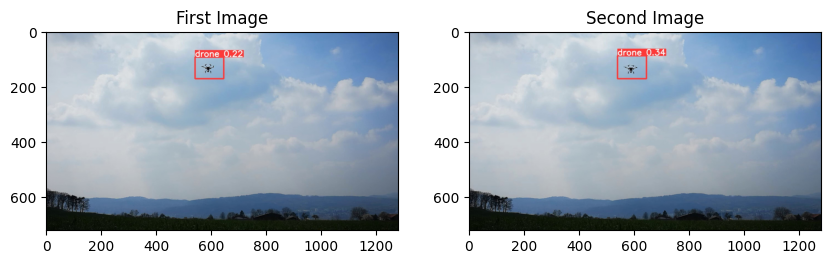

In [39]:
def plot_images(folder_path):
    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg'))]

    # Load the first two images
    first_image_path = os.path.join(folder_path, image_files[0])
    second_image_path = os.path.join(folder_path, image_files[1])

    first_image = Image.open(first_image_path)
    second_image = Image.open(second_image_path)

    # Plot the first two images
    plt.figure(figsize=(10, 5))

    # Plot the first image
    plt.subplot(1, 2, 1)
    plt.imshow(first_image)
    plt.title('First Image')

    # Plot the second image
    plt.subplot(1, 2, 2)
    plt.imshow(second_image)
    plt.title('Second Image')

    plt.show()

if __name__ == "__main__":
    # Replace 'path/to/your/images/folder' with the actual path to your folder of images
    images_folder_path = 'runs/detect/predict'
    plot_images(images_folder_path)

### Same steps for video 2

In [ ]:
source2='Drone_Tracking_2'

In [ ]:
ppaths2=[]
for dirname, _, filenames in os.walk(source2):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            ppaths+=[(os.path.join(dirname, filename))]
ppaths2=sorted(ppaths2)

In [ ]:
!yolo task=detect mode=predict model={best_path0} conf=0.2 source={source2}

In [ ]:
results2 = model2.predict(source2,conf=0.2)
print(len(results2))

In [ ]:
PBOX=pd.DataFrame(columns=range(6))
for i in range(len(results2)):
    arri=pd.DataFrame(results[i].boxes.data.cpu().numpy()).astype(float)
    path=ppaths2[i]
    file=path.split('/')[-1]
    arri=arri.assign(file=file)
    arri=arri.assign(i=i)
    PBOX=pd.concat([PBOX,arri],axis=0)
PBOX.columns=['x','y','x2','y2','confidence','class','file','i']
display(PBOX)

In [ ]:
PBOX['class']=PBOX['class'].apply(lambda x: class_map[int(x)])
PBOX=PBOX.reset_index(drop=True)
display(PBOX)
display(PBOX['class'].value_counts())

In [ ]:
images2=[]
for i in tqdm(range(len(ppaths2))):
    images2+=[draw_box2(i)]

In [ ]:
if __name__ == "__main__":
    # Example image list (replace this with your actual list)
    image_list = images2
    # Example destination folder (replace this with your desired folder)
    destination_folder = "detections"
    # Move images to the destination folder
    move_images_to_folder(image_list, destination_folder)